# Project 2 - Marcos Hernandez

#Polynomial Regression

#Features ->Independent Variables(Sometimes also called explanatory varianbles)
#Label ->Dependent VariablE(The target to be predicted)

#Types of regression: Multiple regression, Polynomial Regression, Polynomial Multiple Regression

1. Simple Linear Regression-> a Linear relationship bewtween *one independent variable* and *one dependent variable*.
2. Multiple Regression-> Linear relationships between *two or more independent variables* and *one dependent variable*.
3. Polynomial Regression-> Modeling the relationships between *one independent variables* and *one dependent variable* using an *n^th degree polynomial function*.
4. Polynomial Multiple Regression-> Modeling the relationship between *two or more independent variables* and *one dependent variable* using an *n^th degree polynomial function*.

### Multiple Linear Regression 
- Using Boston housing and pricing dataset (found here: "http://lib.stat.cmu.edu/datasets/boston")





In [ ]:
import pandas as pd # we will need to import pandas to read the data and converted into a dataframe
import numpy as np # we will need to import numpy to convert the dataframe into a numpy array

data_url = "http://lib.stat.cmu.edu/datasets/boston" # the Boston dataset can be found in this url, since it has been removed from newer versions of sklearn
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # read the data from the url, the data starts at the 22nd row and has no header

#We first need to consolidate the data becase in the url, the last 3 columns spill over into the next row,
#Need to concatenate every other full column starting with the first column
#with the first two columns of every other column starting with the second column
# (excluding the third column because it is the target)
#this will give us the correct dataset and fix the spill over:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #[records(start-inclusive : end-exclusive : jupms),columns(start-inclusive : end-exclusive : jupms)]

#The target will simply be the third column in every other column starting at the second row 
# (this was the third column that spilled over but we excluded in the step above)
target = raw_df.values[1::2, 2] # the target [from record 1(using 0 indexing): to the end: jumping 2 so every other record]
#df=pd.DataFrame(data)
data #Printing the dataframe to validate the values, and format


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
print("The shape of the data is: ",data.shape)

#creating a dataframe, with the column names given in the dataset description
df=pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"] )

#Adding the target column to the dataframe
df["MEDV"]=target #this sets the data in the "MEDV",our target column, to the df column "MEDV" since it doesnt have one it creates it, and sets the values to the target

"""
BELOW ARE THE COLUMN NAMES AND DESCRIPTIONS OF THE BOSTON DATASET:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 """
df.head()

The shape of the data is:  (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#The boston dataset is a good dataset so no cleaning is necesary:
#this shows the datatypes and the columns in the df, as well as the number of non null values per column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
#To check if there is any missing values we use the following :
df.isnull().sum()
#this shows that all there are no missing values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Feature Selection

The next step is to select the features that are relevant to train the model. 
<br>The features that directly influence the result (which is prices of houses as shown below) to train the model. 
<br>We want to look for Features that have the strongest correlations to our Target.

For this, we use the **corr() function**, which computes the pair wise correlation of columns:

## What is a correlation:

A **positive correlation** is when two variables move in tandem. A positive correlation between two variables exixst if a variable exists increases as the other also increses, and a variable decreases when the other variable decreases. In other words, a positive correlation is when two variables move in the same/or avery similar direction.<br><br>A **negative coorelation** exists when a variable increases and the other decreses, and vise versa.

<br> **A correlation is represented in a range form -1 to +1**.

<br>**1** Indicates a Strong positive correlation.
<br>**0** Indicates NO correlation.
<br>**-1** Indicates a Strong Negative correlation.

In [ ]:
corr= df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Based on the results above from the pair wise correlation results, taking a look at our TARGET column **("MEDV)**, we can see that both colums **"LSTAT" (-0.737663 correlation)**, and **"RM" (+0.695360 correlation)** have the strongest correlations to the value we want to train the model to predict.

**We will use these two features to train our model:**
<br> Our model will aim to predict the target column, "MEDV" (Median value of owner-occupied homes in $1000's)

**LSTAT- "% of lower status of population"**
<br>-> (-0.737663) Strong Negative correlation means this value decreases in a similar way the "MEDV" value increases, and vise versa

**RM-  "Average number of rooms per dewlling"**
<br>-> (+0.695360) Strong Positive correlation means this value incresesa in a similar way the "MEDV" value increses, and the same is true when decresing

## Finding the correlation programmatically 
Because some datasets can be massive, we can write a program to find the top n^th features with the strogest correlation programmatically as oppossed to doing it visually.

In [118]:
# For this instance our n^th here is 3

# Get the top n^th features that have the strongest correlation to a specified target
print("Labels of top 3 features with the highest correlation to \"MEDV\": \n",
df.corr().nlargest(3, 'MEDV').index) # Return the Feature labels
print(" We Ignore MEDV, because it obiously has a perfect positive correlation to itself.")

# Get the top 3 correlation values
print("\nValues of top 3 features with the highest correlation to \"MEDV\": \n",
    df.corr().abs().nlargest(3,"MEDV").values[:,13]) # Returns the Feature correlation values


Labels of top 3 features with the highest correlation to "MEDV": 
 Index(['MEDV', 'RM', 'ZN'], dtype='object')
 We Ignore MEDV, because it obiously has a perfect positive correlation to itself.

Values of top 3 features with the highest correlation to "MEDV": 
 [1.         0.73766273 0.69535995]


# Building the model
Since RM and LSTAT both have high correlation values to our target,<br>we will use these two features to build out model.

### Multiple Regression
Training a model using more than one independent-variable to predict one dependent-variable (aka, Label or Target), such as in this case, is known as multiple regression.

## Building Scatter Plots
#### (MEDV & LSTAT) & (MEDV & RM)

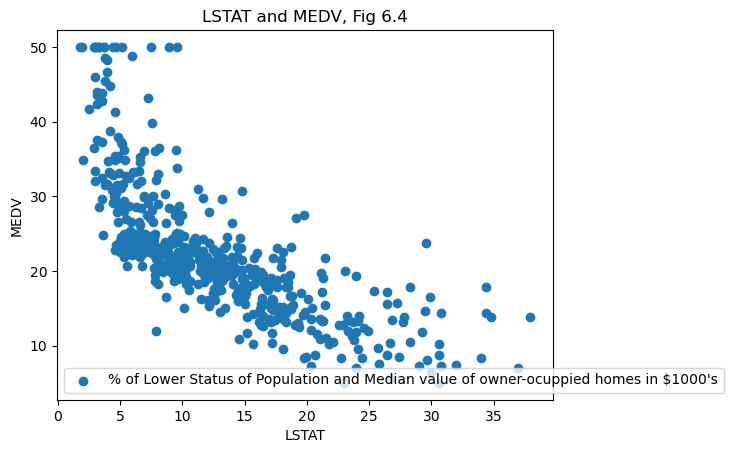

In [119]:
import matplotlib.pyplot as plt

plt.scatter(df["LSTAT"],df["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("LSTAT and MEDV, Fig 6.4")
plt.legend(["% of Lower Status of Population and Median value of owner-ocuppied homes in $1000's"])
plt.show()

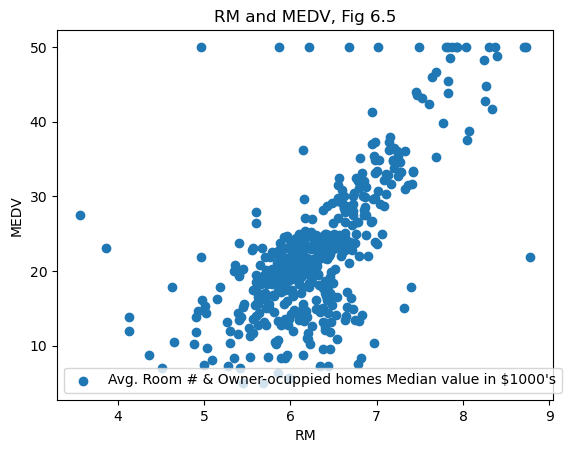

In [110]:
import matplotlib.pyplot as plt2
plt2.scatter(df["RM"],df["MEDV"])
plt2.xlabel("RM")
plt2.ylabel("MEDV")
plt2.title("RM and MEDV, Fig 6.5")
plt2.legend(["Avg. Room # & Owner-ocuppied homes Median value in $1000's"])
plt2.show()

### 3D Plot (MEDV, LSTAT, & RM)

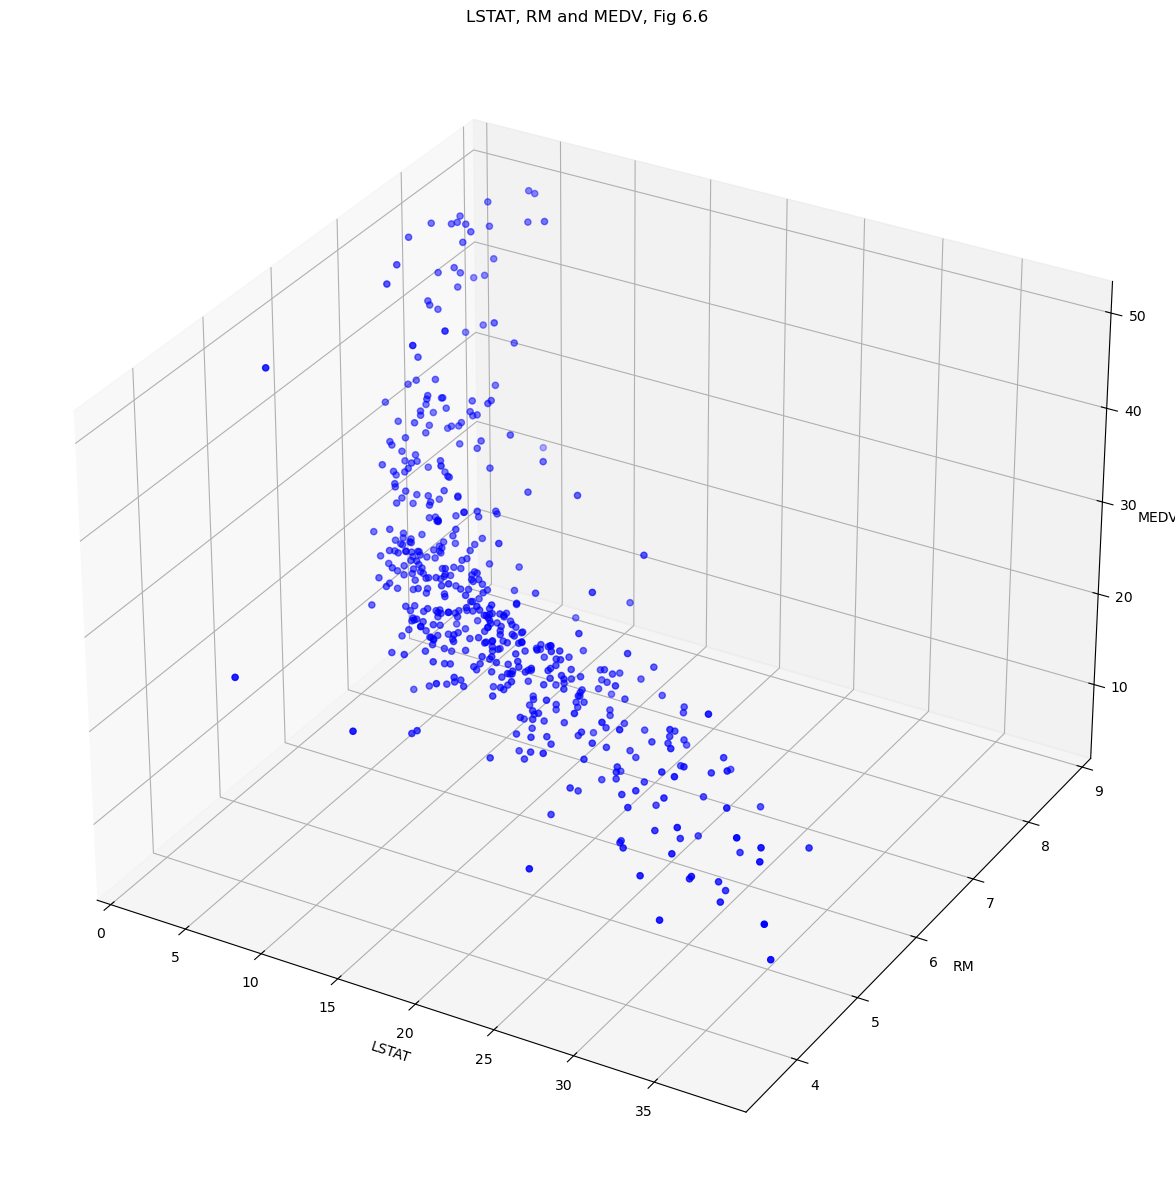

In [111]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax= fig.add_subplot(111, projection= '3d')

ax.scatter(df["LSTAT"],df["RM"],df["MEDV"], c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
ax.set_title("LSTAT, RM and MEDV, Fig 6.6")
plt.show()


In [ ]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Updated 3D Plot (MEDV, LSTAT, & RM)

In [49]:
import plotly.express as px

fig = px.scatter_3d(df, x='RM', y='LSTAT', z='MEDV', color='MEDV', title='3D Scatter Plot of Boston Housing Data')
fig.update_layout(
	scene=dict(
		xaxis_title='RM',
		yaxis_title='LSTAT',
		zaxis_title='MEDV'
	),
	title=dict(
		text='3D Scatter Plot of Boston Housing Data',
		font=dict(size=20)
	),
    width=800,
    height=800
)
fig.show()

# Training the model
To train the model we need two dataframes, ***x*** and ***y***. 

The  ***x*** DataFrame will contain the combination of the ***LSTAT and RM*** features.

The  ***y*** DataFrame will contain the ***MEDV*** label(the target we are tryong to predict).

In [93]:
X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

### Train/Test Split
1. For the first model we will perform a train/test split of ***70-train/30-test***

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state=5) # 70% training and 30% testing

#Taking a look at the shapes of the training sets:
print("The shape of the X_train.shape function shows that the set has 354 rows, and 2 colums(the independent features):\n",
    X_train.shape)

print("\nThe shape of the Y_train.shape function shows that the set has 354 rows, and 1 colum(the dependent feature):\n",
    Y_train.shape)

The shape of the X_train.shape function shows that the set has 354 rows, and 2 colums(the independent features):
 (354, 2)

The shape of the Y_train.shape function shows that the set has 354 rows, and 1 colum(the dependent feature):
 (354,)


In [96]:
print("\nThe shape of the X_test.shape function shows that the set has 152 rows, and 2 colums(the independent features):\n",
    X_test.shape)

print("\nThe shape of the Y_test.shape function shows that the set has 152 rows, and 1 colum(the dependent feature):\n",
    Y_test.shape)

print("\nNOTE: This time the size of the test dataset is only 152 rows, because the test size is only 30% of the original 506 in the original dataset. \n The other 70% (354) is in the training set as shown above.")


The shape of the X_test.shape function shows that the set has 152 rows, and 2 colums(the independent features):
 (152, 2)

The shape of the Y_test.shape function shows that the set has 152 rows, and 1 colum(the dependent feature):
 (152,)

NOTE: This time the size of the test dataset is only 152 rows, because the test size is only 30% of the original 506 in the original dataset. 
 The other 70% (354) is in the training set as shown above.


### Model Building
We will use Linear_Regression class form sklearn to perform linear regression and train our model.

In [97]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #creating the model
model.fit(X_train, Y_train) #fitting the model to our training data


LinearRegression()

In [98]:
# Using the testing dataset to perform some predictions
price_pred = model.predict(X_test)


#Just for funziez, lets see the predicted prices
print(price_pred) #printing the predicted prices

[37.1689804  29.32035435 25.58027087  1.15646598 33.20707082  8.44197544
 30.37221305 27.57463198 26.12976704 22.01624296 32.13551356 22.87944818
 22.66492916 30.77766892 26.87728603 20.52649771  0.07700859 17.73715803
 12.4852138  21.5337132   5.41730621 23.83920281 37.59483142 24.38880315
 29.45572317 12.97936433 26.66174451 22.28532221 27.15672582 28.55285561
 11.92050914 10.73457063 18.04609262 25.06581211 26.04950614 22.86501105
 26.1328205  12.78655949 37.06519613 33.01820965 20.30298129  1.93992794
 27.34958946 16.72165643 27.15469487 29.58123631 -2.17117984 17.36152288
 20.6656613  14.2815521  20.69641698 21.34126367 24.86153667 16.4242525
 17.55536557 27.42110603 35.81573065 19.9548413  28.51674903 20.32610396
 20.05492026 22.80452284 16.55464235 30.90531655 22.41792004 13.19072701
 23.32544191 25.48850806 22.6711396  21.3650088  19.39396145 26.0214486
 16.76791647 20.44659086 19.48139777 29.92580392 19.25450197 13.28096308
 28.36799435 19.04982456 21.99396576 38.66237215 16.0

In [99]:
# Just for funzies, let's compare the predicted prices to the actual prices
print(Y_test) #printing the actual price values of the test dataset 

print("\nAbove we print the first and last 5 values in the test dataset.\nWe can see that most of the predicted prices are close to the actual prices, while others are not.")

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
60     18.7
108    19.8
298    22.5
138    13.3
370    50.0
Name: MEDV, Length: 152, dtype: float64

Above we print the first and last 5 values in the test dataset.
We can see that most of the predicted prices are close to the actual prices, while others are not.


### Analyzing Model Performance
We will use the R-Squared method to know how close the test data fits the model predicted regression line.

Avalue of 1.0 means a perfect fit. So, the goal is to get as close as we can to 1:

In [100]:
print('R-Squared: %.4f' % model.score(X_test, Y_test)) #printing the R-squared value of the model

R-Squared: 0.6162


### Ploting the prediction (training dataset results) vs the actual values(testing dataset)

The mean squared error of the model is:  26.81635736883835


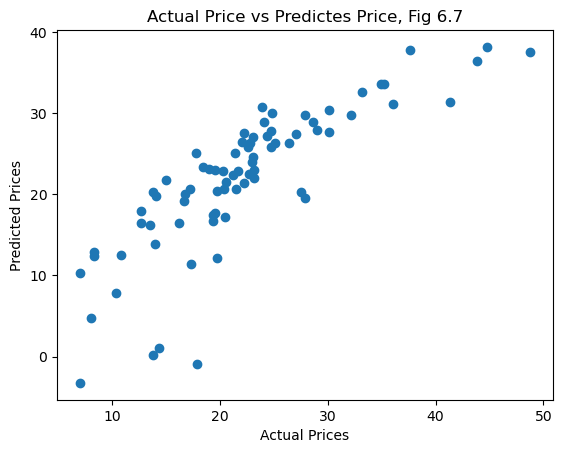

In [112]:
from sklearn.metrics import mean_squared_error #importing the mean squared error function from sklearn

mse = mean_squared_error(Y_test, price_pred) #calculating the mean squared error of the model
print("The mean squared error of the model is: ", mse) 

plt.scatter(Y_test, price_pred) #plotting the actual prices against the predicted prices
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predictes Price, Fig 6.7")
plt.show()

### Getting the Intercept and Coefficients

In [102]:
print(model.intercept_)
print(model.coef_)

0.3843793678034615
[-0.65957972  4.83197581]


In [103]:
print(model.predict([[30,5]])) #predicting the price of a house with 30% lower status of the population and 5 rooms

[4.75686695]


/Users/marcogod/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



### Ploting the 3D Hyperplane

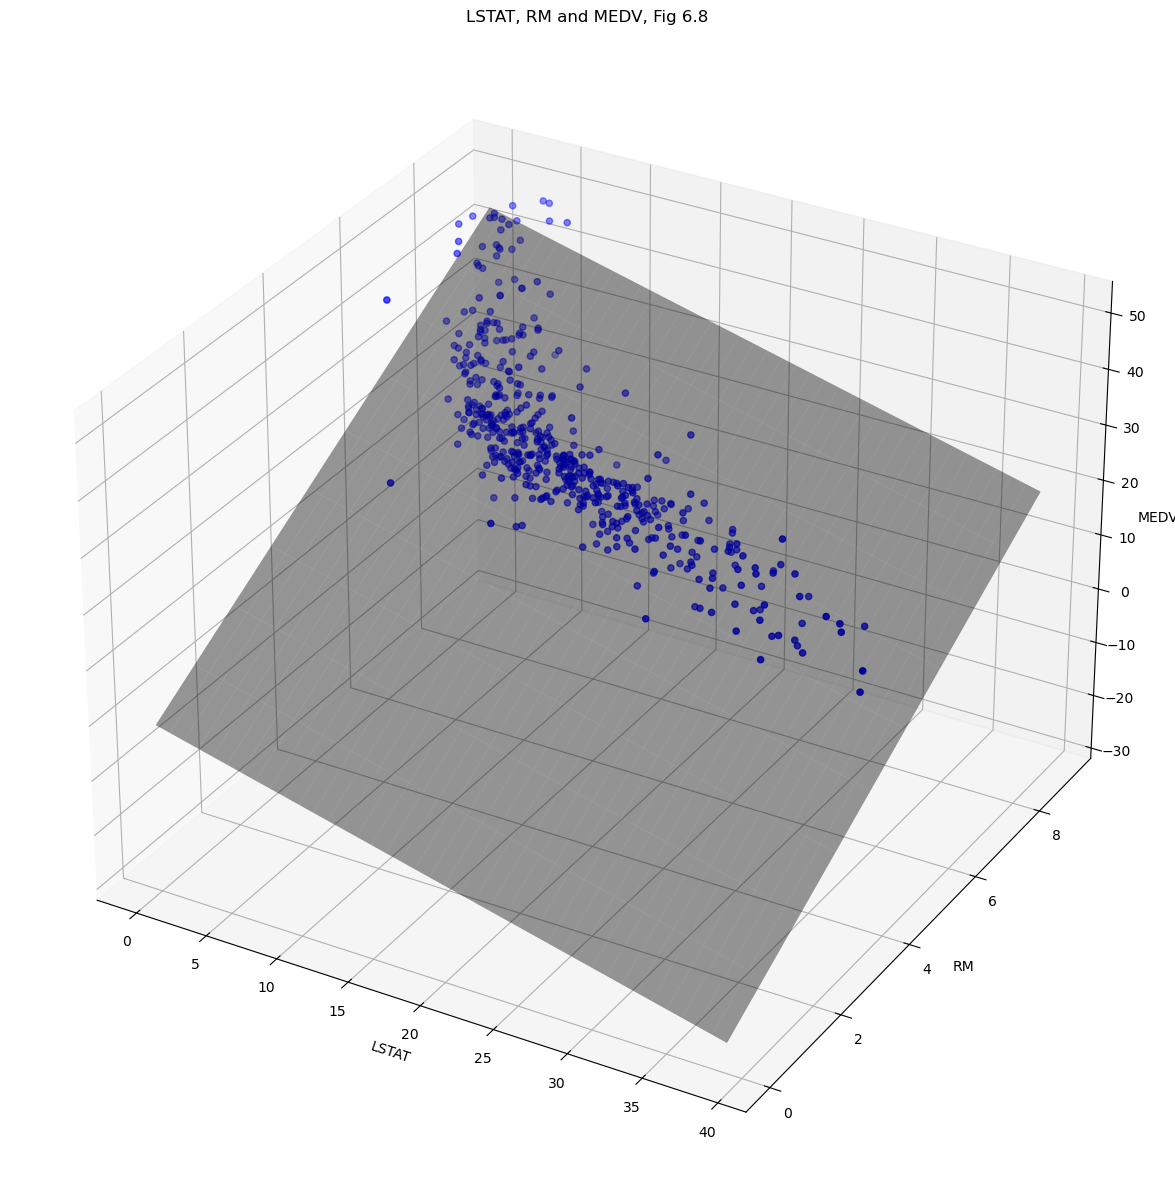

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

data_url = "http://lib.stat.cmu.edu/datasets/boston" # the Boston dataset can be found in this url, since it has been removed from newer versions of sklearn
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # read the data from the url, the data starts at the 22nd row and has no header

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #[records(start-inclusive : end-exclusive : jupms),columns(start-inclusive : end-exclusive : jupms)]
target = raw_df.values[1::2, 2] # the target [from record 1(using 0 indexing): to the end: jumping 2 so every other record]

#creating a dataframe, with the column names given in the dataset description
df=pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"] )

#Adding the target column to the dataframe
df["MEDV"]=target #this sets the data in the "MEDV",our target column, to the df column "MEDV" since it doesnt have one it creates it, and sets the values to the target

X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['LSTAT'],
X['RM'],
Y,
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
ax.set_title("LSTAT, RM and MEDV, Fig 6.8")
#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1) #---for LSTAT---
y_surf = np.arange(0, 10, 1) #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
rstride=1,
cstride=1,
color='None',
alpha = 0.4)
plt.show()

### Model Using a 50-train 50-test ratio

R-Squared: 0.6264
The mean squared error of the model is:  31.283656527178163


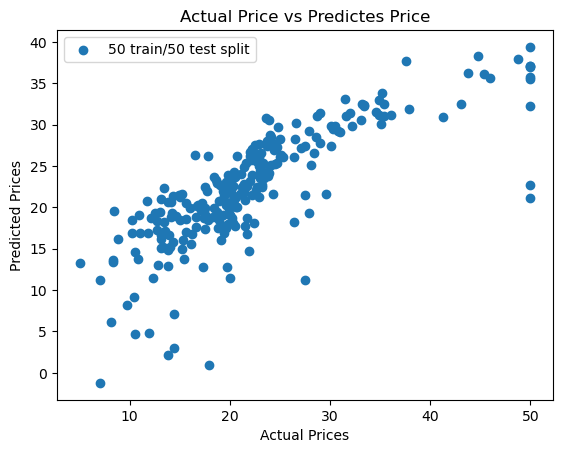

In [105]:
import pandas as pd # we will need to import pandas to read the data and converted into a dataframe
import numpy as np # we will need to import numpy to convert the dataframe into a numpy array

data_url = "http://lib.stat.cmu.edu/datasets/boston" # the Boston dataset can be found in this url, since it has been removed from newer versions of sklearn
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # read the data from the url, the data starts at the 22nd row and has no header

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #[records(start-inclusive : end-exclusive : jupms),columns(start-inclusive : end-exclusive : jupms)]
target = raw_df.values[1::2, 2] # the target [from record 1(using 0 indexing): to the end: jumping 2 so every other record]

#creating a dataframe, with the column names given in the dataset description
df=pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"] )

#Adding the target column to the dataframe
df["MEDV"]=target #this sets the data in the "MEDV",our target column, to the df column "MEDV" since it doesnt have one it creates it, and sets the values to the target

X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.5, random_state=5) # 50% training and 50% testing

from sklearn.linear_model import LinearRegression

model1 = LinearRegression() #creating the model
model1.fit(X_train, Y_train) #fitting the model to our training data

# Using the testing dataset to perform some predictions
price_pred = model1.predict(X_test)

print('R-Squared: %.4f' % model1.score(X_test, Y_test)) #printing the R-squared value of the model

from sklearn.metrics import mean_squared_error #importing the mean squared error function from sklearn

mse = mean_squared_error(Y_test, price_pred) #calculating the mean squared error of the model
print("The mean squared error of the model is: ", mse) 

plt.scatter(Y_test, price_pred) #plotting the actual prices against the predicted prices
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predictes Price")
plt.legend(["50 train/50 test split"])
plt.show()

### Model Using a 75-train 25-test ratio

R-Squared: 0.6294
The mean squared error of the model is:  30.5926626944839


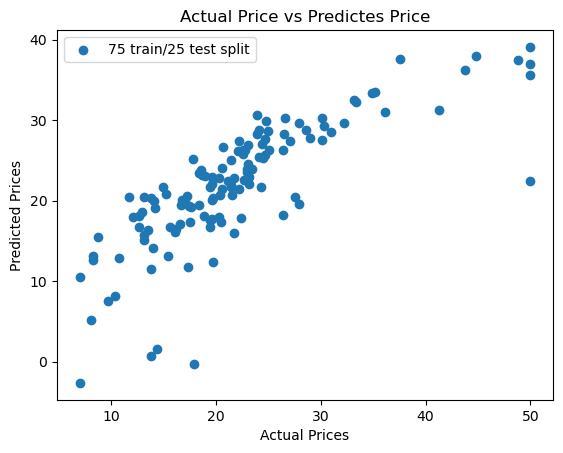

In [82]:
import pandas as pd # we will need to import pandas to read the data and converted into a dataframe
import numpy as np # we will need to import numpy to convert the dataframe into a numpy array

data_url = "http://lib.stat.cmu.edu/datasets/boston" # the Boston dataset can be found in this url, since it has been removed from newer versions of sklearn
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # read the data from the url, the data starts at the 22nd row and has no header

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #[records(start-inclusive : end-exclusive : jupms),columns(start-inclusive : end-exclusive : jupms)]
target = raw_df.values[1::2, 2] # the target [from record 1(using 0 indexing): to the end: jumping 2 so every other record]

#creating a dataframe, with the column names given in the dataset description
df=pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"] )

#Adding the target column to the dataframe
df["MEDV"]=target #this sets the data in the "MEDV",our target column, to the df column "MEDV" since it doesnt have one it creates it, and sets the values to the target

X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25, random_state=5) # 75% training and 25% testing

from sklearn.linear_model import LinearRegression

model2 = LinearRegression() #creating the model
model2.fit(X_train, Y_train) #fitting the model to our training data

# Using the testing dataset to perform some predictions
price_pred = model2.predict(X_test)

print('R-Squared: %.4f' % model2.score(X_test, Y_test)) #printing the R-squared value of the model

from sklearn.metrics import mean_squared_error as mean_squared_error2 #importing the mean squared error function from sklearn

mse = mean_squared_error2(Y_test, price_pred) #calculating the mean squared error of the model
print("The mean squared error of the model is: ", mse) 

plt.scatter(Y_test, price_pred) #plotting the actual prices against the predicted prices
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predictes Price")
plt.legend(["75 train/25 test split"])
plt.show()

### Model Using a 85-train 15-test ratio

R-Squared: 0.6389
The mean squared error of the model is:  26.81635736883835


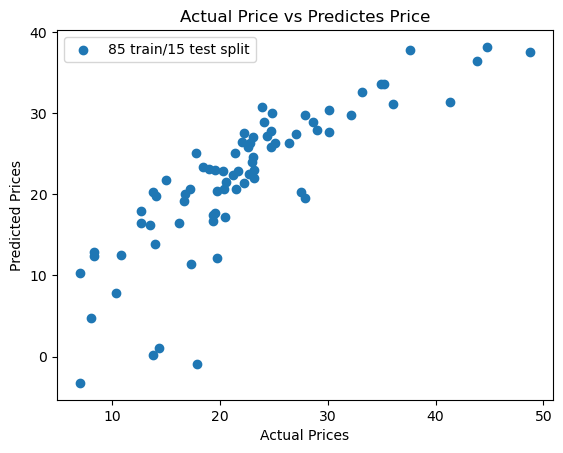

In [108]:
import pandas as pd # we will need to import pandas to read the data and converted into a dataframe
import numpy as np # we will need to import numpy to convert the dataframe into a numpy array

data_url = "http://lib.stat.cmu.edu/datasets/boston" # the Boston dataset can be found in this url, since it has been removed from newer versions of sklearn
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # read the data from the url, the data starts at the 22nd row and has no header

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #[records(start-inclusive : end-exclusive : jupms),columns(start-inclusive : end-exclusive : jupms)]
target = raw_df.values[1::2, 2] # the target [from record 1(using 0 indexing): to the end: jumping 2 so every other record]

#creating a dataframe, with the column names given in the dataset description
df=pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"] )

#Adding the target column to the dataframe
df["MEDV"]=target #this sets the data in the "MEDV",our target column, to the df column "MEDV" since it doesnt have one it creates it, and sets the values to the target

X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.15, random_state=5) # 85% training and 15% testing

from sklearn.linear_model import LinearRegression

model3 = LinearRegression() #creating the model
model3.fit(X_train, Y_train) #fitting the model to our training data

# Using the testing dataset to perform some predictions
price_pred = model3.predict(X_test)

print('R-Squared: %.4f' % model3.score(X_test, Y_test)) #printing the R-squared value of the model

from sklearn.metrics import mean_squared_error #importing the mean squared error function from sklearn

mse = mean_squared_error(Y_test, price_pred) #calculating the mean squared error of the model
print("The mean squared error of the model is: ", mse) 

plt.scatter(Y_test, price_pred) #plotting the actual prices against the predicted prices
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predictes Price")
plt.legend(["85 train/15 test split"])
plt.show()